# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

# **i. Introduction**

- **Name:** Thaliban Allaam Adristo
- **Batch**: HCK - 025

**Objective:** 

The goal is to create a machine learning model with the ability to predict an individual's obesity level based on their eating habits and physical condition. The algorithm used is XGBoost since it is currently one of the most accurate algorithms available which was proven in the cross-validation process.

Since our case is associated with health-related concerns, we want to minimize false predictions as much as possible, especially false negatives. According to the cross-validation results, it shows that XGBoost has the highest recall score compared to the other model. Therefore, XGBoost was chosen for this case.

**Problem Background:** 

Through this project, we analyze health-related factors to create a machine learning model that can predict an individual’s obesity level based on their physical condition and daily habits. In 2018, Indonesia had an obesity rate of 21.8% which is higher than the average world obesity rate of 12.5%. The Indonesian government plans to reduce this number to 3% by 2030. This machine learning model can help doctors and nutritionists in diagnosing their patients.

**Data Overview:** 

The dataset contains information regarding an individual's obesity level based on their physical condition and daily habits. The people in the dataset represents people from Mexico, Peru, and Colombia. The data was collected through a web platform survey and the final result was a total of 2111 entries with 17 features. The features represents the individual's physical condition as well as their daily habits. The target is "Obesity Level" which is represented by NObesity in the original dataset and divided into seven different classes, including `Insufficient Weight`, `Normal Weight`, `Overweight Level I`, `Overweight Level II`, `Obesity Type I`, `Obesity Type II` and `Obesity Type III`.

# **ii. Conceptual Problems**

**1. Explain "bagging" and how it works.**

Bagging is short for "Bootstrap" and "Aggregating". Bagging combines the two to form one ensemble model. This is how bagging works.
1. Bootstrapping: Creating multiple subsets of data from the original dataset.
2. Training: Subsets from the bootstrapping process is used to train models independently creating multiple models.
3. Aggregating: Predictions from all the independent models are combined by averaging (for regression) or majority voting (for classification) to create a final prediction.

**2. Explain the difference between Random Forest algorithm and the boosting algorithm that you choose.**

Random Forest algorithm is categorized as a bagging algorithm which is a different type of ensemble model. Since its a different type of model, there will be differences, especially regarding its characteristics and how it works. Let's compare Random Forest with one of the boosting algorithms, XGBoost.

| Feature | Random Forest | XGBoost |
|:-------:|:--------------:|:--------:|
| Ensemble Method | Bagging | Boosting |
| Data Sampling | Bootstrap sampling | Weighted data points |
| Tree Structure | Decision tree | Decision stumps |
| Flexibility | Versatile | Sensitive to outliers and missing values |
| Interpretability | Less interpretable | A lot more interpretable (feature importance) |
| Overfitting | More resistant | More likely to be overfit, especially on small datasets. |

**3. Explain cross validation.**

Cross validation is a technique used to evaluate a model's performance to an independent/unseen data. The goal is to see how well the model will perform in the real world. This technique trains multiple models by using multiple subsets and provides performance measurements, like mean and standard deviation. These measurements provide us with a confidence interval on the expected performance of the model.

Benefits of cross validation, include:
- Avoid overfitting.
- Finding the best performing model.
- Hyperparameter tuning.
- Better use of the data since it is used for both training and validation.

# **iii. Import Libraries**

In [1]:
# Data Manipulation and Calculation
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Export model
import pickle 

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# **iv. Data Loading**

## **1. Loading**

In this section, we're going to load the data from the source into this notebook.

In [2]:
# Load data from .csv file
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head(10) # First 10 entries of the dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [4]:
df.tail(10) # Last 10 entries of the dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2101,Female,25.722004,1.628470,107.218949,yes,yes,3.0,3.0,Sometimes,no,2.487070,no,0.067329,0.455823,Sometimes,Public_Transportation,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,yes,yes,3.0,3.0,Sometimes,no,2.320068,no,0.045246,0.413106,Sometimes,Public_Transportation,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,yes,yes,3.0,3.0,Sometimes,no,1.650612,no,1.537639,0.912457,Sometimes,Public_Transportation,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,yes,yes,3.0,3.0,Sometimes,no,1.610768,no,1.510398,0.931455,Sometimes,Public_Transportation,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,yes,yes,3.0,3.0,Sometimes,no,1.796267,no,1.728332,0.897924,Sometimes,Public_Transportation,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Dataset Description:**
- `Gender`: Male/Female
- `Age`: Age of individual (years)
- `Height`: Height of individual (meters)
- `Weight`: Weight of individual (kg)
- `family_history_with_overweight`: Overweight heredity (Yes/No)
- `FAVC`: Frequent consumption of high caloric food (Yes/No)
- `FCVC`: Frequency of consumption of vegetables (1 = Never, 2 = Sometimes, 3 = Always)
- `NCP`: Number of main meals per day (1-4)
- `CAEC`: Consumption of food between meals (1 = No, 2 = Sometimes, 3 = Frequently, 4 = Always)
- `SMOKE`: Smoking habit (Yes/No)
- `CH2O`: Consumption of water (1 = Less than a Liter, 2 = 1–2 Liters, 3 = more than 2 Liters)
- `SCC`: Calorie consumption monitoring (Yes/No)
- `FAF`: Physical activity frequency per week (0 = None, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days)
- `TUE`: Time using technology devices a day (0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours)
- `CALC`: Consumption of alcohol (1 = Never, 2 = Sometimes, 3 = Frequently, 4 = Always)
- `MTRANS`: Daily transportation
- `NObeyesdad`: Obesity level

Source: https://stacyy.medium.com/itp-449-exploratory-data-analysis-project-obesity-levels-based-on-eating-habits-and-physical-82fa10775c2e

**Key Notes:**
- There are no missing values in the dataset.
- The column names are a bit confusing. We need to rename the column names to improve its readability.

## **2. Renaming the Columns**

In this section, we're going to rename the column names to improve its readability.

In [6]:
# Renaming the columns with "rename()" method
df = df.rename(columns={"family_history_with_overweight": "Overweight Family History",
                    "FAVC": "High Caloric Diet",
                    "FCVC": "Vegetable Diet",
                    "NCP": "Meals per Day",
                    "CAEC": "Snacking Between Meals",
                    "SMOKE": "Smoking",
                    "CH2O": "Daily Water Intake",
                    "SCC": "Monitor Calories",
                    "FAF": "Physical Activity",
                    "TUE": "Gadget Usage",
                    "CALC": "Alcohol Intake",
                    "MTRANS": "Daily Transportation",
                    "NObeyesdad": "Obesity Level"
                    })

# **v. Exploratory Data Analysis (EDA)**

## **1. Initial Data Overview**

Previously, we had already renamed the column names to improve the dataset's readability.

**Data summary after renaming.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2111 non-null   object 
 1   Age                        2111 non-null   float64
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Overweight Family History  2111 non-null   object 
 5   High Caloric Diet          2111 non-null   object 
 6   Vegetable Diet             2111 non-null   float64
 7   Meals per Day              2111 non-null   float64
 8   Snacking Between Meals     2111 non-null   object 
 9   Smoking                    2111 non-null   object 
 10  Daily Water Intake         2111 non-null   float64
 11  Monitor Calories           2111 non-null   object 
 12  Physical Activity          2111 non-null   float64
 13  Gadget Usage               2111 non-null   float

**Key Takeaways:**

According to summary above: 
- The column names has been successfully renamed.
- There are 8 columns with numerical data type and 9 columns with string data type.

For the 9 columns with string data type, they are sure to be categorical features. However, there are also some categorical features with numerical data type as well. They are most likely already encoded from the data source. Therefore, we need to distinguish between numerical can categorical features to ease our analysis process in the later stages.

According to the original dataset description, the following columns are encoded categorical features.
- `Vegetable Diet`
- `Meals per Day`
- `Daily Water Intake`
- `Physical Activity`
- `Gadget Usage`

**Distinguishing numerical and categorical columns.**

In [8]:
num_cols = ['Age', 'Height', 'Weight'] # Define numerical columns list
cat_cols = df.drop(columns = ['Age', 'Height', 'Weight']).columns.to_list() # Define categorical columns list

print('Numerical Columns')
print(num_cols)
print()
print('Categorical Columns')
print(cat_cols)

Numerical Columns
['Age', 'Height', 'Weight']

Categorical Columns
['Gender', 'Overweight Family History', 'High Caloric Diet', 'Vegetable Diet', 'Meals per Day', 'Snacking Between Meals', 'Smoking', 'Daily Water Intake', 'Monitor Calories', 'Physical Activity', 'Gadget Usage', 'Alcohol Intake', 'Daily Transportation', 'Obesity Level']


In the later stages, we can call these variables to quickly filter between numerical and categorical columns.

**Dataset Overview**

In [9]:
# Data Statistics for Numerical Features
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00


**Key Notes:**
- The features above might contain categorical features as well. There might be a possibility of categorical features already being encoded which is why they have a numerical data type.
- For all features, the mean and median are relatively close. Therefore, the data distribution is most likely symmetrical.

In [10]:
# Data Statistics for Categorical Features
''' Convert the data types of all categorical columns to string object,
then view the stats using "describe()" method.'''

df[cat_cols].astype(str).describe(include='object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
Overweight Family History,2111,2,yes,1726
High Caloric Diet,2111,2,yes,1866
Vegetable Diet,2111,810,3.0,652
Meals per Day,2111,635,3.0,1203
Snacking Between Meals,2111,4,Sometimes,1765
Smoking,2111,2,no,2067
Daily Water Intake,2111,1268,2.0,448
Monitor Calories,2111,2,no,2015
Physical Activity,2111,1190,0.0,411


**Key Notes:**
- Most of the features have relatively small cardinality level, except for `Vegetable Diet`, `Meals per Day`, `Daily Water Intake`, `Physical Activity`, and `Gadget Usage`. These features might need cardinality handling in the Feature Engineering session later.
- The high cardinal features have a numerical form of data which tells us that the features have already been encoded.

## **2. Data Validation**

### **a. Data Type**

In the previous section, we found that there are some categorical features that have numerical data types due to already being encoded. In this section, we're going to change the data types to string object to match with the other categorical features.

In [11]:
# Change data type using "astype()" method
df = df.astype({"Vegetable Diet": str,
                "Meals per Day": str,
                "Daily Water Intake": str,
                "Physical Activity": str,
                "Gadget Usage": str})

In [12]:
df.info() # Show dataset after

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2111 non-null   object 
 1   Age                        2111 non-null   float64
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Overweight Family History  2111 non-null   object 
 5   High Caloric Diet          2111 non-null   object 
 6   Vegetable Diet             2111 non-null   object 
 7   Meals per Day              2111 non-null   object 
 8   Snacking Between Meals     2111 non-null   object 
 9   Smoking                    2111 non-null   object 
 10  Daily Water Intake         2111 non-null   object 
 11  Monitor Calories           2111 non-null   object 
 12  Physical Activity          2111 non-null   object 
 13  Gadget Usage               2111 non-null   objec

Based on the output above, we have successfully converted the data type.

### **b. Duplicate Check**

In this section, we're going to check if there are duplicate data in the dataset.

**Count the amount of duplicated data.**

In [13]:
df.duplicated().sum()

24

**View the duplicated data.**

In [14]:
df[df.duplicated() == True]

,Gender,Age,Height,Weight,Overweight Family History,High Caloric Diet,Vegetable Diet,Meals per Day,Snacking Between Meals,Smoking,Daily Water Intake,Monitor Calories,Physical Activity,Gadget Usage,Alcohol Intake,Daily Transportation,Obesity Level
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


**Key Takeaways:**
- There are 24 duplicated data in the dataset.
- Since there are no unique identifier in the dataset, there might be two possibilities:
    1. The data is really duplicated.
    2. There are multiple individuals with the same statistics.

Based on the frequency of duplication (especially for index 763 to 923), it is most likely that these are duplicated data from the same individual. Therefore, we will drop them in the "Feature Engineering" section.

### **c. Range Check**

In this section, we're going to check if there are any invalid in the numerical features. Based on the context of the dataset, the numerical features shouldn't have a negative value.

**Check for negative values.**

In [15]:
for x in num_cols:
    negative_value = df[df[x] < 0]
if not negative_value.empty:
    print("Invalid value found:")
    print(negative_value)
else:
    print("No invalid value found.")

No invalid value found.


## **3. Correlation Analysis**

In this section, we're going to do a correlation analysis between all the features and the target which is `Obesity Level`. Since the target is a categorical feature, we're going to use **Kendall's method** and **Chi-squared method** depending on the data type of the feature.

To make the calculation process easier, we're going to create a function.

**Define function.**

In [16]:
def analyze_correlation(df, target_column):
    """
    This function allows you to calculate the relationship between the features in a dataframe and a
    specific target. This function calculates the correlation, Chi-square, Cramer's V, and
    p-value using different methods depending on the data type of the feature.
    Methods in the function:
    - Kendall's method
    - Chi-Squared test
    
    Parameters:
    - df            : Dataframe containing the columns that we want to analyze.
    - target_column : The target column to which the columns from df will be compared to.
        
    Returns:
    pd.DataFrame(results): Results of the calculations made in the function saved in the form of
    a dataframe.
    """
    results = [] #Empty list to store the results of the calculation
    
    for col in df.columns: #When "col" is the same as target, skip to the next value in the loop
        if col == target_column:
            continue

        '''
        Defining a dataframe made from two columns "col" and "target_column" that will be used for the
        calculations. After that, we drop the missing values using "dropna()" because missing values will 
        cause an error during the calculations later on.
        '''
        
        valid_data = df[[col, target_column]].dropna() #Dataframe used for calculations
        
        if len(valid_data) > 1:
            if df[col].dtype in [np.float64, np.int64]: #When "col" is a numerical data, use Kendall's method
                corr, p_value = stats.kendalltau(valid_data[col], valid_data[target_column])
                chi2 = np.nan #Exception handling
                cramer_value = np.nan #Exception handling

            else: #When "col" is a categorical data, use Chi-Squared test
                #Calculate Chi-Square value
                contingency_table = pd.crosstab(valid_data[col], valid_data[target_column])
                chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
                corr = np.nan #Exception handling

                #Parameters for Cramer's V
                N = contingency_table.sum().sum()
                r, k = contingency_table.shape
                rcorr = r - 1  # Rows - 1
                kcorr = k - 1  # Columns - 1

                #Chi2 bias correction
                chi2corr = max(0, chi2 - (k - 1) * (r - 1) / (N - 1))

                #Calculate Cramer's V value
                cramer_value =  np.sqrt((chi2corr/N) / min(kcorr, rcorr))  # Cramér's V
        else:
            corr, p_value = np.nan, np.nan  #Exception handling
            cramer_value = np.nan #Exception handling
        results.append({
            "Feature": col,
            "Correlation Value": corr,
            "Cramer's Value": cramer_value,
        })
    
    return pd.DataFrame(results)

**Calculate the correlations using the defined function.**

In [17]:
# Analyze features from "df" dataframe with 'Obesity Level' as the target
df_corr = analyze_correlation(df, 'Obesity Level')

df_corr

,Feature,Correlation Value,Cramer's Value
0,Gender,NaN,0.558193
1,Age,0.201031,NaN
2,Height,0.026116,NaN
3,Weight,0.305024,NaN
4,Overweight Family History,NaN,0.542804
5,High Caloric Diet,NaN,0.332467
6,Vegetable Diet,NaN,0.684970
7,Meals per Day,NaN,0.577848
8,Snacking Between Meals,NaN,0.356078
9,Smoking,NaN,0.123380


**Key Takeaways:**
- Numerical features are calculated with Kendall's method which results in a correlation value, whereas categorical features are calculated with Chi-squared test which the value is then used to calculate Cramer's Value.
- `Age` has the weakest relationship with the target according to the calculation results.
- The top three features that has the highest relationship with the target are `Daily Water Intake`, `Physical Activity` and `Gadget Usage`.
- This result would be used later for feature selection.

## **4. Data Exploration**

### **a. Obesity Levels based on Amount of People**

In this section, we're going to analyze the amount of people from each level of obesity.

**Plot the pie chart that shows amount of individuals per level.**

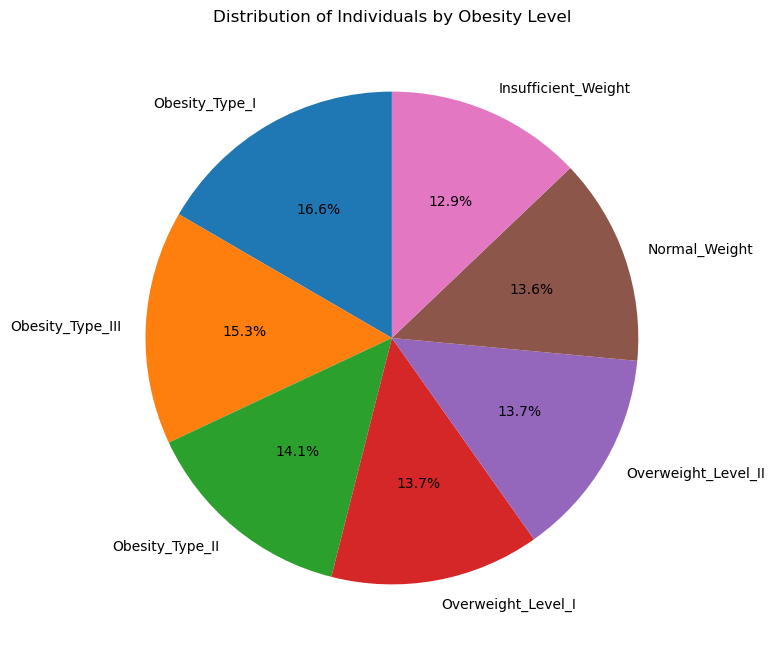

In [18]:
# Defining the parameters
obesity_counts = df['Obesity Level'].value_counts() # Calculate the frequency of each obesity level
labels = obesity_counts.index.tolist() # Extract obesity level categories as labels
sizes = obesity_counts.values.tolist() # Extract corresponding frequencies as sizes

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) # Create the pie chart
plt.title('Distribution of Individuals by Obesity Level')
plt.show()

In [19]:
# Get the precise numbers for each level
df['Obesity Level'].value_counts()

Obesity Level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

**Key Notes:**
- Obesity type I has the most patient with 351 followed by obesity type III and II with 324 and 297 patients respectively.
- Based on the pie chart, the majority of people are unhealthy (either suffering from overweight, obesity, or insufficient weight). Only the minority of the people (13.5%) are considered healthy.

**Insights:**
- The amount of patients is spread relatively even between each levels, but a bit higher in the higher spectrum. This is concerning and we should soon find out why a lot of people are suffering from obesity compared.

### **b. Obesity Levels based on Gender**

In this section, we're going to analyze the level of obesity based on gender.

**Plot the pie chart that shows obesity levels based on gender.**

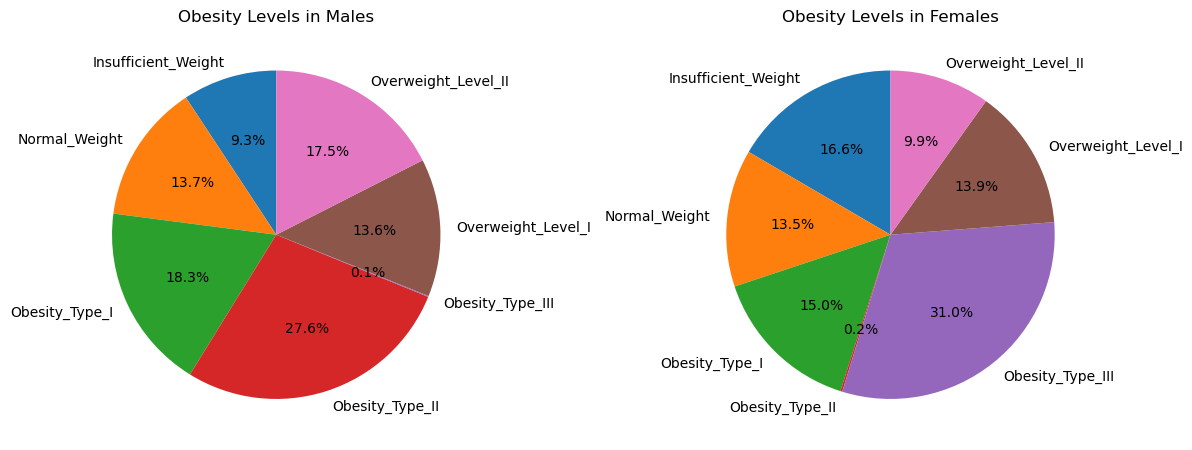

In [20]:
# Group data by gender and obesity level
gender_obesity_counts = df.groupby(['Gender', 'Obesity Level'])['Gender'].count().unstack()

# Get obesity levels and corresponding counts for each gender
male_data = gender_obesity_counts.loc['Male'].values.tolist()
female_data = gender_obesity_counts.loc['Female'].values.tolist()
obesity_levels = gender_obesity_counts.columns.tolist()

# Create subplots for male and female pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
ax1.pie(male_data, labels=obesity_levels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Obesity Levels in Males')

# Female pie chart
ax2.pie(female_data, labels=obesity_levels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Obesity Levels in Females')

plt.tight_layout()
plt.show()

In [21]:
# Show precise numbers
gender_obesity_counts

Obesity Level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


**Key Notes:**
- For males and females, the distribution of amount between each level is relatively similar, except for obesity type II and III.
- There are more males suffering from obesity type II compared to the other levels, whereas for females, they only have two people suffering from it.
- On the contrary, more females are suffering from obesity type III compared to the other levels, whereas for males, there is only one person suffering from it.

**Insights:**
- Based on the dataset, female are more prone to suffer obesity compared to male due to their high amount in the higher end of the spectrum.

### **c. Obesity Levels based on Age**

In this section, we're going to analyze the obesity levels based on age.

**Plot the bar chart that shows obesity levels based on age group.**

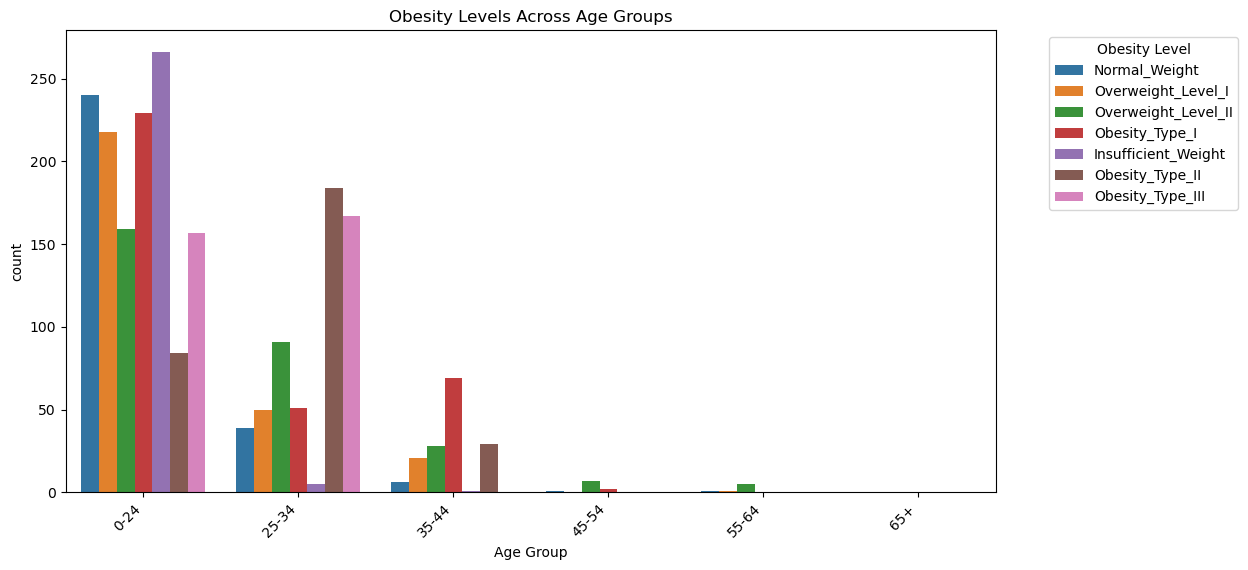

In [ ]:
# Define age groups
age_bins = [0, 25, 35, 45, 55, 65, 100]  # Define age ranges 
age_labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column with age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Obesity Level', data=df)
plt.title('Obesity Levels Across Age Groups')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

**Key Notes:**
- More kids and young adults (0-24) are suffering from insufficient weight compared to other levels. Insufficient weight is followed by normal weight and obesity type I respectively.
- More adults (25-34) are suffering from obesity type II and III compared to other levels.
- Most middle age adults (35-44) suffer from obesity type I.

**Insights:**
- Most kids and young adults (0-24) don't suffer as much from obesity compared to the other age groups. Instead, a large part of them actually suffers from insufficient weight. The reason for this is most likely due to nutrition deficiency.
- Obesity is more prone to adults (25-34) compared to other age groups.
- The amount of obesity patients starts to fade as the age group progress to older ages. The majority of obesity patients comes from younger fellows.

Source: https://www.cepal.org/en/insights/malnutrition-among-children-latin-america-and-caribbean

### **d. Obesity Levels based on Family History**

In this section, we're going to analyze whether family history or hereditary factors have an effect on the patient's conditions.

**Plot the bar chart that shows obesity levels based on family history.**

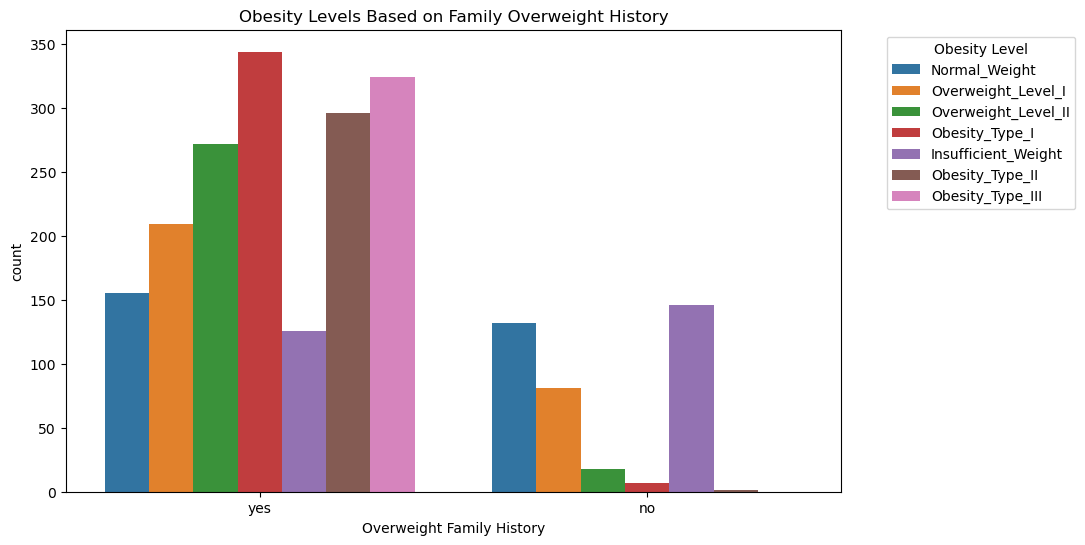

In [ ]:
plt.figure(figsize=(10, 6)) # Define the figure and its size
sns.countplot(x='Overweight Family History', hue='Obesity Level', data=df) # Create plot
plt.title('Obesity Levels Based on Family Overweight History')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

**Key Notes:**
- People with a history of overweight family members have more obese patients compared to the people with no history of overweight family members.
- The majority of people with no history of overweight family members are either normal or has insufficient weight.

**Insights:**
- People with a history of overweight family members are more likely to have overweight. There are two possible reasons for this.
1. There is a genetic influence that may have cause them to get overweight easier.
2. Bad diet that has become a habit among the family.

Source: https://www.health.harvard.edu/staying-healthy/why-people-become-overweight

### **e. Obesity Levels based on Daily Water Intake**

In this section, we're going to analyze the relationship between obesity levels and the daily water intake of the people.

**Plot the bar chart that shows obesity levels based on daily water intake.**

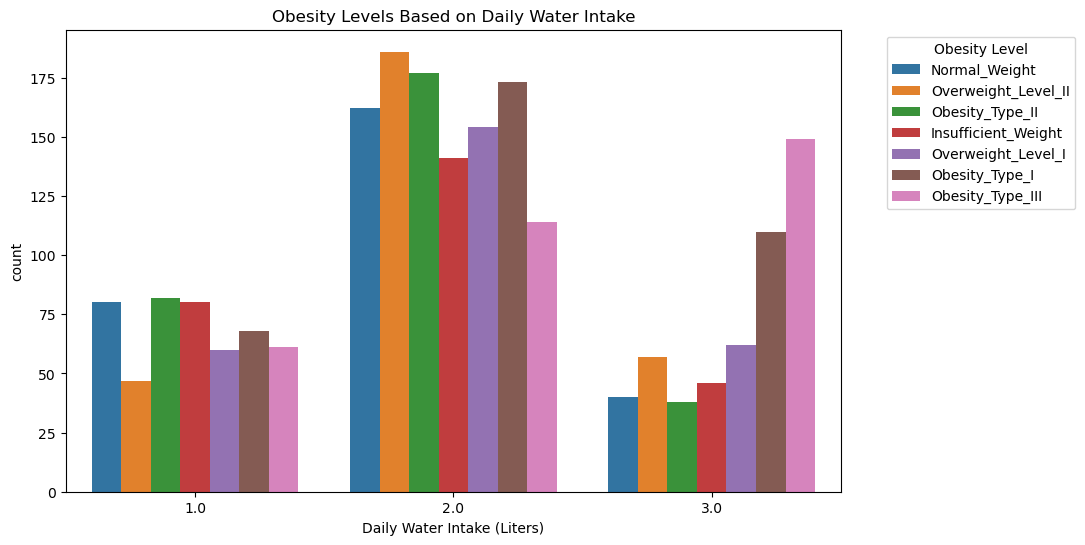

In [79]:
plt.figure(figsize=(10, 6)) # Define the figure and its size
sns.countplot(x='Daily Water Intake', hue='Obesity Level', data=df) # Create plot
plt.title('Obesity Levels Based on Daily Water Intake')
plt.xlabel('Daily Water Intake (Liters)') 
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Key Notes:**
- The obesity level is spread evenly for 1 and 2 liters. For 3 liters, the amount is higher for obesity type I and III.

Since the visualization alone is not enough for us to gain insight, we're going to conduct a hypothesis testing between `Daily Water Intake` and `Obesity Level`. Since the two are both categorical data, therefore we're going to use the Chi-squared testing method.

**Hypothesis Testing:**

- (H0): There is no significant association between daily water intake and obesity level.
- (H1): There is a significant association between daily water intake and obesity level

In [25]:
contingency_table = pd.crosstab(df['Daily Water Intake'], df['Obesity Level'])

chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association.")
else:
    print("Fail to reject the null hypothesis. No significant association.")

Chi-squared statistic: 7955.07
P-value: 0.002
Reject the null hypothesis. There is a significant association.


In [26]:
df_corr[df_corr['Feature'] == 'Daily Water Intake']

,Feature,Correlation Value,Cramer's Value
10,Daily Water Intake,NaN,0.792326


**Key Notes:**
- Based on the Chi-squared test result, the p-value is below the significance level (0.05) which means that we reject the null hypothesis. Rejecting the null hypothesis means that there is a significant association between `Daily Water Intake` and `Obesity Level`.
- Based on the Cramer's Value that we calculated during the correlation analysis, we can see that with a value of 0.79, the two features do have a significant relationship with each other.

### **f. Obesity Levels based on Physical Activity**

In this section, we're going to analyze whether the levels of physical activity has an effect towards the obesity level.

**Plot the bar chart that shows obesity levels based on physical activity.**

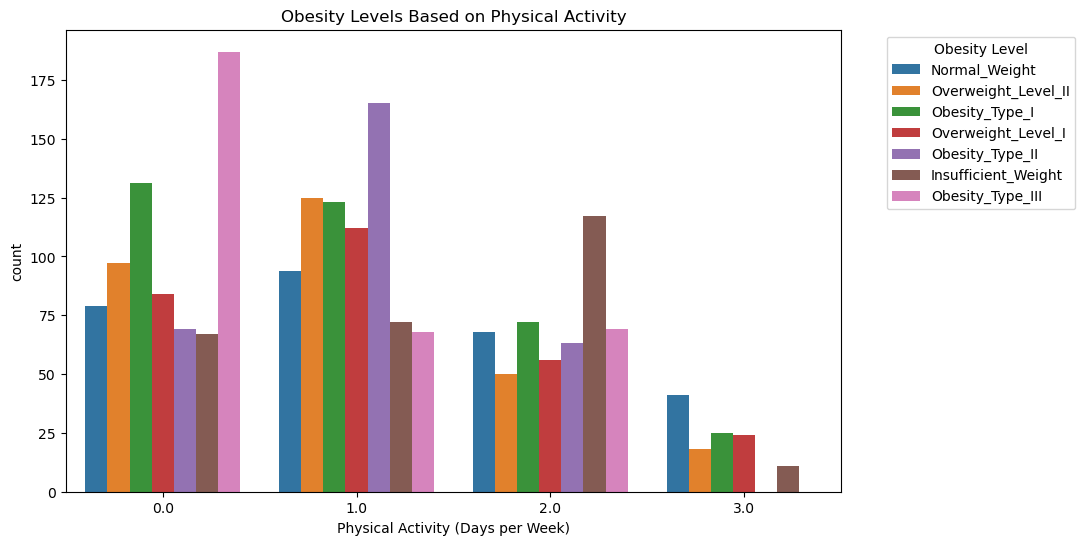

In [80]:
plt.figure(figsize=(10, 6)) # Create the figure
sns.countplot(x='Physical Activity', hue='Obesity Level', data=df) # Create plot
plt.title('Obesity Levels Based on Physical Activity')
plt.xlabel('Physical Activity (Days per Week)')   
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

**Key Notes:**
- Obesity type III is high in people with 0 days of physical activity per week followed by obesity type I and overweight level II respectively.
- Obesity type II is high in people with 1 day of physical activity per week followed by overweight level II and obesity type I respectively.
- Insufficient weight is prominent for people with 2 days of physical activity per week.

**Insights:**
- Obesity is more prominent in people with less that 2 days of physical activity per week. With this result, we can conclude that 2 days of physical activity per week can reduce the risk of obesity.

### **g. Obesity Levels based on Alcohol Intake**

In this section, we're going to analyze the effect of alcohol to the obesity level.

**Plot the bar chart that shows obesity levels based on alcohol intake.**

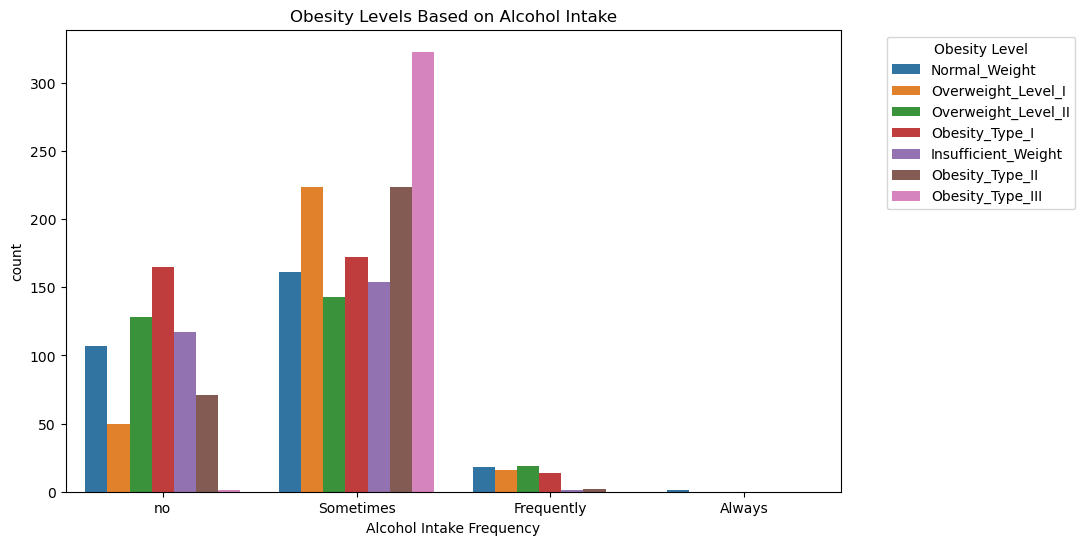

In [ ]:
plt.figure(figsize=(10, 6))  # Define the figure
sns.countplot(x='Alcohol Intake', hue='Obesity Level', data=df) # Create plot
plt.title('Obesity Levels Based on Alcohol Intake')
plt.xlabel('Alcohol Intake Frequency') 
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.show()

**Key Notes:**
- Obesity type III is very prominent in people who sometimes drink alcohol followed by obesity type II and overweight level I respectively.\
- People who drink alcohol frequently are mostly normal weight and overweight with a slight portion suffering obesity type I.

**Insights:**
- Alcohol does have high calories which can be a factor causing obesity, but it isn't the main cause of obesity. Its possible to gain weight from alcohol, but not inevitable. 

Source: https://www.betterhealth.vic.gov.au/health/healthyliving/Alcohol-and-weight-gain

# **vi. Feature Engineering**

## **1. Duplicated Data**

Based on the analysis in the EDA section, we're going to drop the duplicated data.

In [29]:
df = df.drop_duplicates() # Drop duplicated data
df.duplicated().sum() # Calculate the amount of duplicated data

0

Based on the output above, we have successfully dropped the duplicated data.

## **2. Cardinality**

In this section, we're going to check the cardinality of each feature in the dataset.

In [30]:
df.nunique() # Check the cardinality of each feature

Gender                          2
Age                          1402
Height                       1574
Weight                       1525
Overweight Family History       2
High Caloric Diet               2
Vegetable Diet                810
Meals per Day                 635
Snacking Between Meals          4
Smoking                         2
Daily Water Intake           1268
Monitor Calories                2
Physical Activity            1190
Gadget Usage                 1129
Alcohol Intake                  4
Daily Transportation            5
Obesity Level                   7
Age Group                       5
dtype: int64

**Key Takeaways:**
- `Age`, `Height`, and `Weight` are continuous numerical columns which typically doesn't need cardinality handling.
- There are five features with high cardinality that needs handling:
    1. `Vegetable Diet`
    2. `Meals per Day`
    3. `Daily Water Intake`
    4. `Physical Activity`
    5. `Gadget Usage`

    According to the dataset description, these features are encoded categorical features.

**Inspect the five features with high cardinality.**

In [31]:
high_cardinality = ['Vegetable Diet', 'Meals per Day', 'Daily Water Intake', 'Physical Activity', 'Gadget Usage']

for x in high_cardinality:
    print(x)
    print(df[x].unique())

Vegetable Diet
['2.0' '3.0' '1.0' '2.450218' '2.880161' '2.00876' '2.596579' '2.591439'
 '2.392665' '1.123939' '2.027574' '2.658112' '2.88626' '2.714447'
 '2.750715' '1.4925' '2.205439' '2.059138' '2.310423' '2.823179'
 '2.052932' '2.596364' '2.767731' '2.815157' '2.737762' '2.568063'
 '2.524428' '2.971574' '1.0816' '1.270448' '1.344854' '2.959658'
 '2.725282' '2.844607' '2.44004' '2.432302' '2.592247' '2.449267'
 '2.929889' '2.015258' '1.031149' '1.592183' '1.21498' '1.522001'
 '2.703436' '2.362918' '2.14084' '2.5596' '2.336044' '1.813234' '2.724285'
 '2.71897' '1.133844' '1.757466' '2.979383' '2.204914' '2.927218'
 '2.88853' '2.890535' '2.530066' '2.241606' '1.003566' '2.652779'
 '2.897899' '2.483979' '2.945967' '2.478891' '2.784464' '1.005578'
 '2.938031' '2.842102' '1.889199' '2.943749' '2.33998' '1.950742'
 '2.277436' '2.371338' '2.984425' '2.977018' '2.663421' '2.753752'
 '2.318355' '2.594653' '2.886157' '2.967853' '2.619835' '1.053534'
 '2.530233' '2.8813' '2.824559' '2.762325' 

Based on the output above, it looks like that the values resemble a scaled feature which is why the cardinality is so high.

To improve the cardinality, we can round the values so that they have an integer value in accordance to the dataset description.

**Improve the cardinality level.**

In [32]:
# Rounding the values
'''
Looping for every column in "high_cardinality" list:
1. Convert the values from string to float using "astype(float)" method.
2. Rounding the values to the nearest integer with the "round()" method
'''

for x in high_cardinality:
    df[x] = df[x].astype(float).round()

In [33]:
# View the rounded values
df[high_cardinality]

,Vegetable Diet,Meals per Day,Daily Water Intake,Physical Activity,Gadget Usage
0,2.0,3.0,2.0,0.0,1.0
1,3.0,3.0,3.0,3.0,0.0
2,2.0,3.0,2.0,2.0,1.0
3,3.0,3.0,2.0,2.0,0.0
4,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...
2106,3.0,3.0,2.0,2.0,1.0
2107,3.0,3.0,2.0,1.0,1.0
2108,3.0,3.0,2.0,1.0,1.0
2109,3.0,3.0,3.0,1.0,1.0


In [34]:
# Check the new cardinality after rounding
df[high_cardinality].nunique()

Vegetable Diet        3
Meals per Day         4
Daily Water Intake    3
Physical Activity     4
Gadget Usage          3
dtype: int64

Based on the outputs above, we have successfully improved the cardinality level.

## **3. Data Splitting**

In this section, we're going to split between **features (x)** and **target (y)**. Then, we will split them again into **train-set** and **test-set**.

**Splitting features and target.**

In [35]:
x = df.drop(columns= ['Obesity Level']) #Define features
y = df['Obesity Level'] #Define target

**Splitting train-set and test-set.**

In [36]:
'''
Splitting  features (x) and target (y) into train-set and test-set using "train_test_split()" method
from sklearn library with a ratio of 20% test-set and 80% train-set.
'''

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) #Splitting x and y, then define train-set and test-set
print('x train Size: ', x_train.shape) #Show the size of train-set
print('x test Size: ', x_test.shape) #Show the size of test-set
print('y train Size: ', y_train.shape) #Show the size of train-set
print('y test Size: ', y_test.shape) #Show the size of test-set

x train Size:  (1669, 17)
x test Size:  (418, 17)
y train Size:  (1669,)
y test Size:  (418,)


According to the output above, we have successfully split the features and target into train and test.

## **4. Handling Outliers**

In order to choose the correct method for detecting outliers, we need to know the distribution pattern of the data. Therefore, we need to do a normality test by calculating the skewness of the data.

In [37]:
for x in num_cols:
    skewness = df[x].skew() # Calculate skewness
    kurtosis = df[x].kurtosis() # Calculate kurtosis
    if -0.5 < skewness < 0.5: # Condition to determine skewness status
        print(f'{x} is not skewed')
        print(f'Skewness: {skewness:.2f}')
        print(f'Kurtosis: {kurtosis:.2f}')
        print()
    else:
        print(f'{x} is skewed')
        print(f'Skewness: {skewness:.2f}')
        print(f'Kurtosis: {kurtosis:.2f}')
        print()

Age is skewed
Skewness: 1.51
Kurtosis: 2.77

Height is not skewed
Skewness: -0.02
Kurtosis: -0.56

Weight is not skewed
Skewness: 0.24
Kurtosis: -0.71



**Plot the distribution.**

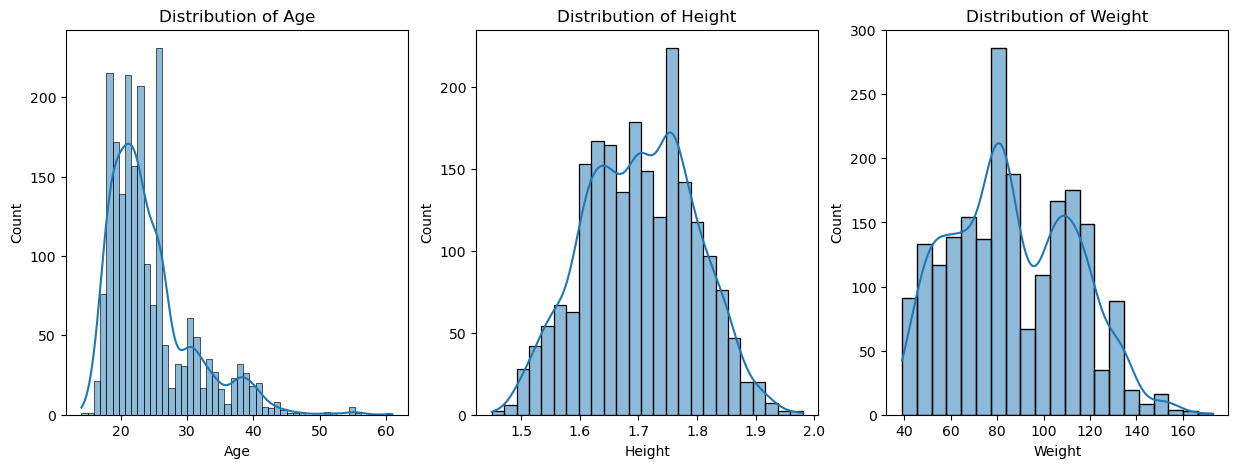

In [38]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Iterate through columns and plot on respective subplots
for i, column in enumerate(num_cols):
    sns.histplot(df[column], kde=True, ax=axes[i])  # Use histplot instead of displot
    axes[i].set_title(f'Distribution of {column}')

# Show the plot
plt.show()

Based on the output above, `Age` is skewed while the rest is not. For `Age`, we will use Tukey's method. For the others, we will use Z-score.

**Define Tukey's method function.**

In [39]:
def tukey(feature):
    """
    Identifies outliers using Tukey's method.
    Parameters:
        feature: The feature containing the data.
    Returns:
        None (prints outlier information)
    """
    # Calculate IQR
    IQR = feature.quantile(0.75) - feature.quantile(0.25)

    # Calculate the boundaries
    lower_boundary = feature.quantile(0.25) - (IQR * 3)
    upper_boundary = feature.quantile(0.75) + (IQR * 3) 

    # Define outliers and non-outliers by filtering using boundaries
    outlier = feature[(feature<lower_boundary) | (feature>upper_boundary)]
    no_outlier = feature[(feature>=lower_boundary) & (feature<=upper_boundary)]
    
    # Print results
    print(f'Amount of outliers: {len(outlier)}')
    print(f'Amount of non-outliers: {len(no_outlier)}')
    print(f'Percentage of outliers: {len(outlier)*100/len(feature):.2f}%')

**Define Z-score function.**

In [40]:
def zscore_outliers(feature, threshold=3):
    """
    Identifies outliers using the Z-score method.
    Parameters:
        feature: The feature containing the data.
        threshold (float): The Z-score threshold for outlier detection. Defaults to 3.
    Returns:
        None (prints outlier information)
    """
    z_scores = np.abs(stats.zscore(feature))
    outliers = feature[z_scores > threshold]
    no_outliers = feature[z_scores <= threshold]

    print(f'Amount of outliers: {len(outliers)}')
    print(f'Amount of non-outliers: {len(no_outliers)}')
    print(f'Percentage of outliers: {len(outliers) * 100 / len(feature):.2f}%')

### **Detect Outliers in `Age`**

In [41]:
tukey(df['Age'])

Amount of outliers: 17
Amount of non-outliers: 2070
Percentage of outliers: 0.81%


Based on the results above, the amount of outliers is pretty small. Therefore, we will not handle the outliers for now.

### **Detect Outliers in `Height`**

In [42]:
zscore_outliers(df['Height'])

Amount of outliers: 0
Amount of non-outliers: 2087
Percentage of outliers: 0.00%


Based on the results, there are no outliers.

### **Detect Outliers in `Weight`**

In [43]:
zscore_outliers(df['Weight'])

Amount of outliers: 1
Amount of non-outliers: 2086
Percentage of outliers: 0.05%


Based on the results above, the amount of outliers is pretty small. Therefore, we will not handle the outliers for now.

## **5. Feature Selection**

In this section, we're going to select the features that we're going to use for the model.

We will determine the features based on the correlation analysis that we previously did in the EDA section.

**View correlation analysis results.**

In [44]:
df_corr

,Feature,Correlation Value,Cramer's Value
0,Gender,NaN,0.558193
1,Age,0.201031,NaN
2,Height,0.026116,NaN
3,Weight,0.305024,NaN
4,Overweight Family History,NaN,0.542804
5,High Caloric Diet,NaN,0.332467
6,Vegetable Diet,NaN,0.684970
7,Meals per Day,NaN,0.577848
8,Snacking Between Meals,NaN,0.356078
9,Smoking,NaN,0.123380


Based on the correlation analysis results, we can see that every feature has a pretty solid relationship with the target `Obesity Level`. Therefore, we're going to **use all of them** for the model.

## **6. Encoding and Scaling**

In this section, we're going to encode the categorical features and scale the numerical features.

**Define numerical and categorical dataframe.**

In [45]:
cat_cols.remove('Obesity Level') # Remove 'Obesity Level' since we dropped it from features and now is the target

x_train_num = x_train[num_cols]
x_train_cat = x_test[cat_cols]

x_test_num = x_test[num_cols]
x_test_cat = x_test[cat_cols]

### **a. Scaling**

**View the data.**

In [46]:
x_train_num

,Age,Height,Weight
1971,19.297004,1.817271,141.917802
2054,21.008297,1.723587,131.929712
470,20.000000,1.560000,51.500000
1139,22.087056,1.792435,89.998729
223,22.000000,1.610000,63.000000
...,...,...,...
1057,24.444846,1.718845,86.319887
1755,22.758998,1.859717,121.284533
778,26.358919,1.755317,82.228794
856,27.899784,1.700000,74.244004


In this section, we're going to scale the numerical features. Based on the analysis that we did in the "Handle Outliers" section, the numerical features that we have are mixed with symmetrical and skewed data. Therefore, we're going to use **MinMaxScaler** since the algorithm doesn't make assumptions on the data distribution.

The scaling process will be done through the **Pipeline method** in the "Model Training" section.

### **b. Encoding**

In this section, we're going to encode the categorical features and target. The method that we're going to use is based on the type of data the feature/target is.

**Options:**
- Nominal Categorical = OneHotEncoder
- Ordinal Categorical = Ordinal Encoder

**View the data.**

In [47]:
x_train_cat

,Gender,Overweight Family History,High Caloric Diet,Vegetable Diet,Meals per Day,Snacking Between Meals,Smoking,Daily Water Intake,Monitor Calories,Physical Activity,Gadget Usage,Alcohol Intake,Daily Transportation
305,Male,yes,yes,2.0,3.0,Sometimes,yes,2.0,no,2.0,1.0,Sometimes,Public_Transportation
386,Female,no,no,1.0,3.0,Sometimes,no,1.0,no,1.0,2.0,no,Public_Transportation
1021,Female,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1625,Male,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation
270,Male,no,yes,2.0,3.0,Sometimes,no,3.0,no,0.0,1.0,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Male,yes,yes,2.0,1.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Automobile
2019,Female,yes,yes,3.0,3.0,Sometimes,no,2.0,no,0.0,1.0,Sometimes,Public_Transportation
757,Female,yes,yes,2.0,4.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation
2064,Female,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation


In [48]:
y_train.unique()

array(['Obesity_Type_III', 'Normal_Weight', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Insufficient_Weight'], dtype=object)

Based on my personal opinion, the categorical features are all nominal categorical data, whereas the target is ordinal. Therefore, we're going to encode the features with OneHotEncoder and the target with Ordinal Encoder.

For the features, the encoding process will be done through the **Pipeline method** in the "Model Training" section. Meanwhile, the target will be encoded manually in this section.

**Encode the target.**

In [49]:
# Encode the target
categories = [['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
               'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']] # Unique values in the target

ordinal_encoder = OrdinalEncoder(categories=categories) # Define OrdinalEncoder

# Reshape y_train and y_test to 2D before fitting and transforming
y_train = ordinal_encoder.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = ordinal_encoder.transform(y_test.values.reshape(-1, 1))

# **vii. Model Definition**

In this section, we're going to define the models that we're going to use. Since our case is a classification case, there are five different algorithms that we're going to try.

1. K-Nearest Neighbors (KNN)
2. Support Vector Machine (SVM)
3. Decision Tree
4. Random Forest
5. XGBoost

The goal is to find the best performing models among this five through cross-validation. To make the competition fair, we decided that we will put on default parameters for every algorithm as the baseline model.

## **1. K-Nearest Neighbors (KNN)**

KNN is a supervised learning algorithm where the main concept is that the similar data points tend to have similar labels or values as well.

**Advantages:**
- Simple, fast, and easy to implement
- No assumptions

**Disadvantages:**
- Not suitable for data with large dimension, may lead to overfitting
- Requires large memory for storing the entire dataset prediction

**Define column transformer.**

In [50]:
# Create preprocessing transformers
numerical_transformer = Pipeline(steps=[
 ('scaler', MinMaxScaler()) # Scaler used for scaling
])

categorical_transformer = Pipeline(steps=[
 ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # Encoder used for encoding
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
 transformers=[
 ('num', numerical_transformer, num_cols),
 ('cat', categorical_transformer, cat_cols)
 ])

**Define KNN pipeline.**

In [51]:
# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor),
 ('classifier', KNeighborsClassifier())
])

## **2. Support Vector Machine (SVM)**

SVM is a supervised learning algorithm that works by finding the boundary that separates the data points of different classes. The boundary (hyperplane) maximizes the distance from the nearest data points of all the classes.

**Advantages:**
- Efficient in high-dimensional space
- High versatility from the kernel functions

**Disadvantages:**
- Choosing the correct hyperparameter can be challenging
- Computationally expensive

**Define SVM pipeline.**

In [52]:
# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor), # Preprocessor already defined in the previous model
 ('classifier', SVC()) 
])

## **3. Decision Tree**

The decision tree is a supervised learning algorithm that predicts the value of a target by learning simple decision rules inferred from the features and its consequences. The decisions are based on criteria, such as information gain and gini impurity values.

**Advantages:**
- Easy to interpret
- Versatility (Can handle numerical and categorical data)
- Non-parametric
- Require minimal data preparation

**Disadvantages:**
- Prone to overfitting
- Bias towards features with more levels

In [53]:
# Create the Decision Tree pipeline
dt_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor), # Preprocessor already defined in the previous model
 ('classifier', DecisionTreeClassifier()) 
])

## **4. Random Forest**

Random forest is an "ensemble" machine learning algorithm that combines the prediction of multiple models to improve the overall performance. It is the ensemble of the decision tree algorithm.

**Advantages:**
- High accuracy
- Robust
- Measures feature importance

**Disadvantages:**
- Complex and computationally expensive
- May be hard to interpret

In [54]:
# Create the Random Forest pipeline
rf_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor), # Preprocessor already defined in the previous model
 ('classifier', RandomForestClassifier()) 
])

## **5. XGBoost**

Boosting is an "ensemble" machine learning algorithm that combines multiple models to create a single and better model. The algorithm is a sequential learner which trains models independently. The next model then learns from the experience of the previous model. In this case, we're going to use XGBoost which is one of the boosting algorithm.

XGBoost is a more optimized version of gradient boosting that is known for its accuracy, efficiency, and scalability. Some of the key features available in XGBoost, including regularization, handling missing values, and parallel processing.

**Advantages:**
- Able to handle large datasets efficiently.
- Parallel processing.
- Wide range of hyperparameters.
- Built-in feature importance analysis.

**Disadvantages:**
- Computationally intensive.
- Prone to overfitting with small datasets.
- Challenging to interpret.

In [55]:
# Create the Boosting pipeline with SVM as the base
xgboost_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor), # Preprocessor already defined in the previous model
 ('classifier', xgb.XGBClassifier()) 
])

# **viii. Model Training**

In this section, we're going to train the previously defined models. After training the models, we're going to cross-validation on the trained models to evaluate the performance of the baseline model.

## **1. K-Nearest Neighbors (KNN)**

**Baseline Model**

In [56]:
# Train the model
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoking',
                                                   'Daily Water Intake',
                                                   'Monitor Calories',
                                                   'Physical Activity',
                                                   'Gadget Usage',
                                                   'Alcohol Intake',
                                                   'Daily Transportation'])])),
                ('classifier', KNeighborsClassifier())])

## **2. Support Vector Machine (SVM)**

**Baseline Model**

In [57]:
# Train the model
svm_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoking',
                                                   'Daily Water Intake',
                                                   'Monitor Calories',
                                                   'Physical Activity',
                                                   'Gadget Usage',
                                                   'Alcohol Intake',
                                                   'Daily Transportation'])])),
                ('classifier', SVC())])

## **3. Decision Tree**

**Baseline Model**

In [58]:
# Train the model
dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoking',
                                                   'Daily Water Intake',
                                                   'Monitor Calories',
                                                   'Physical Activity',
                                                   'Gadget Usage',
                                                   'Alcohol Intake',
                                                   'Daily Transportation'])])),
                ('classifier', DecisionTreeClassifier())])

## **4. Random Forest**

**Baseline Model**

In [59]:
# Train the model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoking',
                                                   'Daily Water Intake',
                                                   'Monitor Calories',
                                                   'Physical Activity',
                                                   'Gadget Usage',
                                                   'Alcohol Intake',
                                                   'Daily Transportation'])])),
                ('classifier', RandomForestClassifier())])

## **5. XGBoost**

**Baseline Model**

In [60]:
# Train the model
xgboost_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoki...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

# **ix. Model Evaluation**

For the model evaluation, we're going to use the recall metric. The reason for this is because the dataset that we're using is medical-related. For this case, a false negative would be more critical than a false positive which is why we want to reduce the false negative as much as possible. Therefore, using recall would be more appropriate in evaluating the model.

## **1. Cross Validation Results**

In this section, we're going to do cross-validation for all of the models defined and trained in the previous section.

Cross validation is a technique used to evaluate a model's performance to an independent/unseen data. The goal is to see how well the model will perform in the real world. This technique trains multiple models by using multiple subsets and provides performance measurements, like mean and standard deviation. These measurements provide us with a confidence interval on the expected performance of the model.

Benefits of cross validation, include:
- Avoid overfitting.
- Finding the best performing model.
- Better use of the data since it is used for both training and validation.

### **a. KNN**

In [61]:
'''
Use cross_val_score() method to conduct the cross validation process.
- knn_pipeline: The model/estimator that we want to tune.
- x_train: The data to fit.
- y_train: The target variable we want to predict.
- cv = 10: Cross validation splitting strategy, 10 means 10-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
'''
knn_recall_train_cross_val = cross_val_score(knn_pipeline,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', knn_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', knn_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', knn_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (knn_recall_train_cross_val.mean()-knn_recall_train_cross_val.std()) , '-', (knn_recall_train_cross_val.mean()+knn_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.71257485 0.80239521 0.73652695 0.80239521 0.73652695 0.77245509
 0.79640719 0.78443114 0.76646707 0.76506024]
Recall Weighted Avg Score - Mean - Cross Validation :  0.7675239881682419
Recall Weighted Avg Score - Std - Cross Validation  :  0.029196984178742745
Recall Weighted Avg Score - Range of Test-Set       :  0.7383270039894991 - 0.7967209723469846


**Cross-Validation Results:**
- The KNN model has an average recall score of 0.76 with a standard deviation of 0.03.
- From the mean and standard deviation, we get a confidence interval of 0.73 - 0.79 for the performance of the KNN model.

### **b. SVM**

In [62]:
'''
Use cross_val_score() method to conduct the cross validation process.
- svm_pipeline: The model/estimator that we want to tune.
- x_train: The data to fit.
- y_train: The target variable we want to predict.
- cv = 10: Cross validation splitting strategy, 10 means 10-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
'''
svm_recall_train_cross_val = cross_val_score(svm_pipeline,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', svm_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', svm_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', svm_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (svm_recall_train_cross_val.mean()-svm_recall_train_cross_val.std()) , '-', (svm_recall_train_cross_val.mean()+svm_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.71856287 0.7005988  0.71856287 0.79640719 0.70658683 0.67664671
 0.78443114 0.74850299 0.73652695 0.72289157]
Recall Weighted Avg Score - Mean - Cross Validation :  0.7309717913570449
Recall Weighted Avg Score - Std - Cross Validation  :  0.03509915618025837
Recall Weighted Avg Score - Range of Test-Set       :  0.6958726351767865 - 0.7660709475373033


**Cross-Validation Results:**
- The SVM model has an average recall score of 0.73 with a standard deviation of 0.03.
- From the mean and standard deviation, we get a confidence interval of 0.70 - 0.76 for the performance of the SVM model.

### **c. Decision Tree**

In [63]:
'''
Use cross_val_score() method to conduct the cross validation process.
- dt_pipeline: The model/estimator that we want to tune.
- x_train: The data to fit.
- y_train: The target variable we want to predict.
- cv = 10: Cross validation splitting strategy, 10 means 10-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
'''
dt_recall_train_cross_val = cross_val_score(dt_pipeline,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', dt_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', dt_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', dt_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (dt_recall_train_cross_val.mean()-dt_recall_train_cross_val.std()) , '-', (dt_recall_train_cross_val.mean()+dt_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.92215569 0.89820359 0.91017964 0.93413174 0.95209581 0.96407186
 0.94011976 0.96407186 0.94011976 0.92771084]
Recall Weighted Avg Score - Mean - Cross Validation :  0.9352860543972298
Recall Weighted Avg Score - Std - Cross Validation  :  0.020550196546465557
Recall Weighted Avg Score - Range of Test-Set       :  0.9147358578507643 - 0.9558362509436953


**Cross-Validation Results:**
- The Decision Tree model has an average recall score of 0.93 with a standard deviation of 0.02.
- From the mean and standard deviation, we get a confidence interval of 0.91 - 0.95 for the performance of the Decision Tree model.

### **d. Random Forest**

In [64]:
'''
Use cross_val_score() method to conduct the cross validation process.
- rf_pipeline: The model/estimator that we want to tune.
- x_train: The data to fit.
- y_train: The target variable we want to predict.
- cv = 10: Cross validation splitting strategy, 10 means 10-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
'''
rf_recall_train_cross_val = cross_val_score(rf_pipeline,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', rf_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', rf_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', rf_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (rf_recall_train_cross_val.mean()-rf_recall_train_cross_val.std()) , '-', (rf_recall_train_cross_val.mean()+rf_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.88622754 0.92215569 0.90419162 0.94011976 0.93413174 0.92215569
 0.91616766 0.94610778 0.92215569 0.91566265]
Recall Weighted Avg Score - Mean - Cross Validation :  0.9209075824255105
Recall Weighted Avg Score - Std - Cross Validation  :  0.0164797274423855
Recall Weighted Avg Score - Range of Test-Set       :  0.9044278549831251 - 0.937387309867896


**Cross-Validation Results:**
- The Random Forest model has an average recall score of 0.92 with a standard deviation of 0.02.
- From the mean and standard deviation, we get a confidence interval of 0.90 - 0.94 for the performance of the Random Forest model.

### **e. XGBoost**

In [65]:
'''
Use cross_val_score() method to conduct the cross validation process.
- rf_pipeline: The model/estimator that we want to tune.
- x_train: The data to fit.
- y_train: The target variable we want to predict.
- cv = 10: Cross validation splitting strategy, 10 means 10-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
'''
xgb_recall_train_cross_val = cross_val_score(xgboost_pipeline,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', xgb_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', xgb_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', xgb_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (xgb_recall_train_cross_val.mean()-xgb_recall_train_cross_val.std()) , '-', (xgb_recall_train_cross_val.mean()+xgb_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.94610778 0.96407186 0.95209581 0.96407186 0.95808383 0.96407186
 0.95209581 0.98203593 0.98203593 0.98795181]
Recall Weighted Avg Score - Mean - Cross Validation :  0.965262246591155
Recall Weighted Avg Score - Std - Cross Validation  :  0.013590118751678667
Recall Weighted Avg Score - Range of Test-Set       :  0.9516721278394763 - 0.9788523653428337


**Cross-Validation Results:**
- The XGBoost model has an average recall score of 0.96 with a standard deviation of 0.01.
- From the mean and standard deviation, we get a confidence interval of 0.95 - 0.97 for the performance of the XGBoost model.

### **f. Overall Result.**

**Save all of the recall values from the results of cross-validation.**

In [66]:
# Dictionary containing the recall value from the results of cross-validation
cv_results = {
    'KNN': knn_recall_train_cross_val,
    'SVM': svm_recall_train_cross_val,
    'Decision Tree': dt_recall_train_cross_val,
    'Random Forest': rf_recall_train_cross_val,
    'XGBoost': xgb_recall_train_cross_val}

# Creating a dataframe from the values in the dictionary
cv_df = pd.DataFrame(cv_results)

# Access the mean and standard deviation result
cv_df.loc['mean'] = cv_df.mean()
cv_df.loc['std'] = cv_df.std()

# Show dataframe
cv_df

,KNN,SVM,Decision Tree,Random Forest,XGBoost
0,0.712575,0.718563,0.922156,0.886228,0.946108
1,0.802395,0.700599,0.898204,0.922156,0.964072
2,0.736527,0.718563,0.910180,0.904192,0.952096
3,0.802395,0.796407,0.934132,0.940120,0.964072
4,0.736527,0.706587,0.952096,0.934132,0.958084
5,0.772455,0.676647,0.964072,0.922156,0.964072
6,0.796407,0.784431,0.940120,0.916168,0.952096
7,0.784431,0.748503,0.964072,0.946108,0.982036
8,0.766467,0.736527,0.940120,0.922156,0.982036
9,0.765060,0.722892,0.927711,0.915663,0.987952


**Key Notes:**
- Mean represents the average recall score of a total 10 recall values which is the result from 10-fold cross validation.
- The standard deviation (std) represents the average deviation of the recall results from the cross-validation process compared to the average recall result (mean). The deviation can be more or less than the average value.
- From the combination of mean and std, we can get confidence interval of the model which represents the range of expected performance output of the model.
- XGBoost has the highest average recall score of 0.96 making it the most accurate model.
- XGBoost has the smallest standard deviation recall score of 0.01 making it the most stable performing model.
- Overall, XGBoost is the best performing model.

**Conclusion:**
- Based on the results, the XGBoost model has the best performance compared to the other models.
- Since XGBoost is the best performing model, we're going to do further hyperparameter tuning on the model.

## **2. Hyperparameter Tuning**

For the hyperparameter tuning method, we're going to use GridSearch method. GridSearch works by working through a predetermined set of hyperparameter values and evaluating the model's performance with cross-validation.

**Advantages:**
- Simple and easy to implement.
- Ensures in finding the best hyperparameter combination.

**Disadvantages:**
- Computationally expensive.
- Does not explore behind the predetermined grid.

In [67]:
# Predetermined set of hyperparameter
param_grid = {
    'classifier__n_estimators': [100, 200, 300], # Number of boosting rounds
    'classifier__learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting
    'classifier__max_depth': [4, 5, 6], # Maximum depth of a tree
    'classifier__subsample': [0.8, 0.9, 1.0], # Subsample ratio of the training instance
    'classifier__colsample_bytree': [0.8, 0.9, 1.0], # Subsample ratio of columns when constructing each tree
    'classifier__reg_alpha': [0, 0.1, 1],  # L1 regularization
    'classifier__reg_lambda': [0, 0.1, 1], # L2 regularization
    'classifier__min_child_weight': [1, 3, 5] # Minimum sum of instance weight (hessian) needed in a child.
}

'''
Use GridSearchV() method to conduct the tuning process.
- xgboost_pipeline: The model/estimator that we want to tune.
- param_grid: The range of parameters that we want to tune with.
- cv = 5: Cross validation splitting strategy, 5 means 5-fold cross validation.
- scoring = 'recall_weighted': Metrics used to evaluate the performance.
- n_jobs = -1: Using all core of processors to maximize the tuning process
'''
xgb_grid_search = GridSearchCV(xgboost_pipeline, param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)

xgb_grid_search.fit(x_train, y_train) # Train the tuner

xgb_best_params = xgb_grid_search.best_params_ # Best parameters according to the tuning results
xgb_best_score = xgb_grid_search.best_score_ # The score when the best parameters are used

# Print the results
print("Best Hyperparameters:", xgb_best_params)
print("Best Score:", xgb_best_score)

Best Hyperparameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 0, 'classifier__subsample': 1.0}
Best Score: 0.9712502922083759


**Best Hyperparameters:** 
- 'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 0, 'classifier__subsample': 1.0

**Best Score:** 0.9712502922083759

In [68]:
# Define model with the best hyperparameters used
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender',
                                                   'Overweight Family History',
                                                   'High Caloric Diet',
                                                   'Vegetable Diet',
                                                   'Meals per Day',
                                                   'Snacking Between Meals',
                                                   'Smoki...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

**Cross-validation using the tuned model.**

In [69]:
xgb_best_recall_train_cross_val = cross_val_score(xgb_best_model,
                                     x_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall_weighted")

# Print results
print('Recall Weighted Avg Score - All - Cross Validation  : ', xgb_best_recall_train_cross_val)
print('Recall Weighted Avg Score - Mean - Cross Validation : ', xgb_best_recall_train_cross_val.mean())
print('Recall Weighted Avg Score - Std - Cross Validation  : ', xgb_best_recall_train_cross_val.std())
print('Recall Weighted Avg Score - Range of Test-Set       : ', (xgb_best_recall_train_cross_val.mean()-xgb_best_recall_train_cross_val.std()) , '-', (xgb_best_recall_train_cross_val.mean()+xgb_best_recall_train_cross_val.std()))

Recall Weighted Avg Score - All - Cross Validation  :  [0.94011976 0.95209581 0.9760479  0.96407186 0.95808383 0.95209581
 0.97005988 0.98802395 0.98802395 0.98795181]
Recall Weighted Avg Score - Mean - Cross Validation :  0.9676574561719933
Recall Weighted Avg Score - Std - Cross Validation  :  0.016324170742797243
Recall Weighted Avg Score - Range of Test-Set       :  0.951333285429196 - 0.9839816269147905


## **3. Evaluation by Metrics**

In this section, we're going to evaluate the performance of models before and after the tuning process.

**Predict using the models.**

In [70]:
# Before Tuning
y_pred_train_xgb_before = xgboost_pipeline.predict(x_train)
y_pred_test_xgb_before = xgboost_pipeline.predict(x_test)

# After Tuning
y_pred_train_xgb_after = xgb_best_model.predict(x_train)
y_pred_test_xgb_after = xgb_best_model.predict(x_test)

The prediction values above will be used for the classification report and confusion matrix.

### **a. Confusion Matrix**

In this section, we're going to evaluate the model using confusion matrix. This matrix depicts the comparison between actual data and the predicted values.

**Before Tuning**

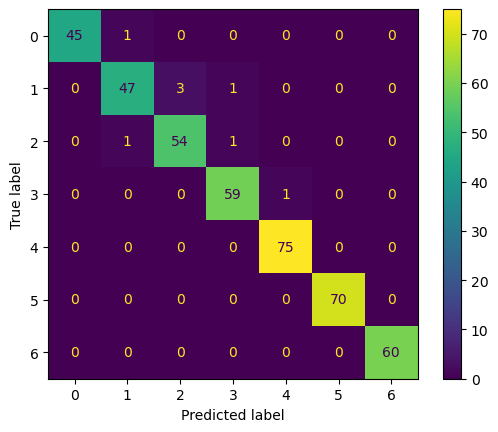

In [71]:
# Confusion Matrix - Test Set (Before Tuning)
cm_test = confusion_matrix(y_test, y_pred_test_xgb_before)
ConfusionMatrixDisplay(cm_test).plot()

**Key Notes:**
- The diagonal represents the correct predictions, whereas the rest represents the false predictions.
- The confusion matrix showed some of the model's struggle to predict class 1 with four false negative predictions, followed by class 2 with two false negatives and class 0 and 3 with one false negative each.
- Overall, there are a total 8 false negative predictions made out of the total 418 predictions.

**After Tuning**

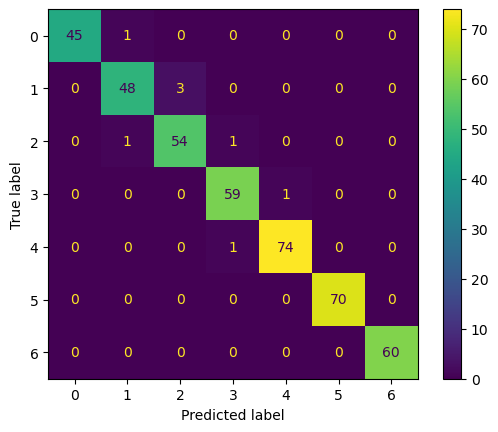

In [72]:
# Confusion Matrix - Test Set (After Tuning)
cm_test = confusion_matrix(y_test, y_pred_test_xgb_after)
ConfusionMatrixDisplay(cm_test).plot()

**Key Notes:**
- After tuning, the test-set shows similar results to the confusion matrix for the model before tuning with a total of 8 false negative predictions made out of the total 418 predictions.
- The model is still struggling to predict class 1 with 3 false negatives and class 2 with 2 false negatives. The rest of false negatives comes from class 0, 3, and 4 with one false negative each.

### **b. Classification Report**

Classification report is a report that displays the overall performance of the model. The report consists of precision, recall, and f1-score for every class.

**Before Tuning**

In [73]:
# Model Evaluation - Train-Set & Test-Set (Before Hyperparameter Tuning)
print('TRAIN-SET (Before)')
print(classification_report(y_train, y_pred_train_xgb_before))
print('TEST-SET (Before)')
print(classification_report(y_test, y_pred_test_xgb_before))

TRAIN-SET (Before)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       221
         1.0       1.00      1.00      1.00       231
         2.0       1.00      1.00      1.00       220
         3.0       1.00      1.00      1.00       230
         4.0       1.00      1.00      1.00       276
         5.0       1.00      1.00      1.00       227
         6.0       1.00      1.00      1.00       264

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

TEST-SET (Before)
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.96      0.92      0.94        51
         2.0       0.95      0.96      0.96        56
         3.0       0.97      0.98      0.98        60
         4.0       0.99      1.00      0.99        75
         5.0       1.00      1.00      1.

**Key Notes:**
- The train-set report shows a perfect score for all of the metrics which is a sign of overfitting. 
- Before tuning, the recall score for test-set is 0.98, which is slightly lower than the train-set, but is still considered high performing.
- In the test-set, the score for class 1.0, 2.0, and 3.0 is slightly lower compared to the other class, meaning that the model is struggling more to identify these classes compared to the other classes.

**After Tuning**

In [74]:
# Model Evaluation - Train-Set & Test-Set (After Hyperparameter Tuning)
print('TRAIN-SET (After)')
print(classification_report(y_train, y_pred_train_xgb_after))
print('TEST-SET (After)')
print(classification_report(y_test, y_pred_test_xgb_after))

TRAIN-SET (After)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       221
         1.0       1.00      1.00      1.00       231
         2.0       1.00      1.00      1.00       220
         3.0       1.00      1.00      1.00       230
         4.0       1.00      1.00      1.00       276
         5.0       1.00      1.00      1.00       227
         6.0       1.00      1.00      1.00       264

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

TEST-SET (After)
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.96      0.94      0.95        51
         2.0       0.95      0.96      0.96        56
         3.0       0.97      0.98      0.98        60
         4.0       0.99      0.99      0.99        75
         5.0       1.00      1.00      1.00

**Key Notes:**
- Overall, the report shows similar performance from both train-set and test-set.
- For the test-set, there is a slight improvement in recall and f1-score for class 1.0, 3.0, and 4.0.
- Based on the result, while there is some slight improvement regarding the performance of the model, the tuning did not improve the overfitting problem of the model.

**Improvement:**
- Apply regularization to the model. The XGBoost model has a built-in regularization capability. Since the tuning process did not apply the regularization to achieve the best score, we can still manually apply the regularization parameter to prevent overfitting.
- Feature selection can also be improved by removing a couple of features to reduce the complexity.
- We need a bigger dataset if we want to use XGBoost. While XGBoost is great at handling large datasets, it is very prone to overfitting when used on a small dataset.

# **x. Model Saving**

In this section, we will save the model to be used for model inference.

**Exporting the files.**

In [75]:
# XGBoost Model
with open('xgb_model.pkl', 'wb') as file_1:
  pickle.dump(xgb_best_model, file_1)

# Ordinal Encoder
with open('ordinal_encoder.pkl', 'wb') as file_2:
  pickle.dump(ordinal_encoder, file_2)

# **xi. Conclusion**

## **1. Objective**

Based on the objective, the goal is to create a machine learning model with the ability to predict an individual's obesity level based on their physical conditions and habits. We decided to use XGBoost due to the result of cross validation between the five different model algorithms that we used. According to the cross-validation results, the XGBoost algorithm is the overall best performing model with a high performing recall score and a small standard deviation which also makes it the most stable performing model.

## **2. EDA**

The dataset consists of 3 numerical features and 14 categorical features with no missing values.

**Correlation Analysis**

In [76]:
df_corr

,Feature,Correlation Value,Cramer's Value
0,Gender,NaN,0.558193
1,Age,0.201031,NaN
2,Height,0.026116,NaN
3,Weight,0.305024,NaN
4,Overweight Family History,NaN,0.542804
5,High Caloric Diet,NaN,0.332467
6,Vegetable Diet,NaN,0.684970
7,Meals per Day,NaN,0.577848
8,Snacking Between Meals,NaN,0.356078
9,Smoking,NaN,0.123380


**Description:**

- Numerical features are calculated with Kendall's method which results in a correlation value, whereas categorical features are calculated with Chi-squared test which the value is then used to calculate Cramer's Value.
- `Age` has the weakest relationship with the target according to the calculation results.
- The top three features that has the highest relationship with the target are `Daily Water Intake`, `Physical Activity` and `Gadget Usage`.

**Insights from the Data**

- The amount of patients is spread relatively even between each levels.
- Females are more prone to suffer obesity compared to males due to their high amount in the higher end of the spectrum.
- Most kids and young adults (0-24) don't suffer as much from obesity compared to the other age groups. Instead, a large part of them actually suffers from insufficient weight.
- Obesity is more prone to adults (25-34) compared to other age groups.
- People with a history of overweight family members are more likely to have overweight. There are two possible reasons for this.
    1. There is a genetic influence that may have cause them to get overweight easier.
    2. Bad diet that has become a habit among the family.
- Obesity is more prominent in people with less that 2 days of physical activity per week.
- Alcohol does have high calories which can be a factor causing obesity, but it isn't the main cause of obesity. Its possible to gain weight from alcohol, but not inevitable. 

## **3. Model Evaluation**

**Confusion Matrix**

**Before Tuning**
- The confusion matrix showed some of the model's struggle to predict class 1 with four false negative predictions, followed by class 2 with two false negatives and class 0 and 3 with one false negative each.
- Overall, there are a total 8 false negative predictions made out of the total 418 predictions.

**After Tuning**
- After tuning, the test-set shows similar results to the confusion matrix for the model before tuning with a total of 8 false negative predictions made out of the total 418 predictions.
- After tuning, the model is still struggling to predict class 1 with 3 false negatives and class 2 with 2 false negatives. The rest of false negatives comes from class 0, 3, and 4 with one false negative each.

**Classification Report**

**Before Tuning**
- The train-set report shows a perfect score for all of the metrics which is a sign of overfitting. 
- Before tuning, the recall score for test-set is 0.98, which is slightly lower than the train-set, but is still considered high performing.
- In the test-set, the score for class 1.0, 2.0, and 3.0 is slightly lower compared to the other class, meaning that the model is struggling more to identify these classes compared to the other classes.

**After Tuning**
- Overall, the report shows similar performance from both train-set and test-set.
- For the test-set, there is a slight improvement in recall and f1-score for class 1.0, 3.0, and 4.0.
- Based on the result, while there is some slight improvement regarding the performance of the model, the tuning did not improve the overfitting problem of the model.

**Improvement Ideas**
- Apply regularization to the model. The XGBoost model has a built-in regularization capability. Since the tuning process did not apply the regularization to achieve the best score, we can still manually apply the regularization parameter to prevent overfitting.
- Feature selection can also be improved by removing a couple of features to reduce the complexity.
- We need a bigger dataset if we want to use XGBoost. While XGBoost is great at handling large datasets, it is very prone to overfitting when used on a small dataset.